In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train = 50  # 训练样本数 (n_train: 训练样本数量, 即训练数据的个数为50)
x_train, _ = torch.sort(torch.rand(n_train) * 5)  # 排序后的训练样本 (x_train: 训练输入数据, 随机生成n_train个数据, 并将其放大5倍后排序)
# torch.rand: 生成均匀分布的随机数 (rand: random, 随机)
# torch.sort: 对张量排序 (sort: 排序)

def f(x):  # 定义函数f表示真实数据生成过程
    return 2 * torch.sin(x) + x**0.8  # f(x): 2倍的x的正弦值加上x的0.8次幂

y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出 (y_train: 训练输出数据, 在f(x_train)的基础上加入标准差为0.5的正态分布噪声)
# torch.normal: 生成正态分布随机数 (normal: 正态分布)
# (0.0, 0.5): 平均值为0.0, 标准差为0.5

x_test = torch.arange(0, 5, 0.1)  # 测试样本 (x_test: 测试输入数据, 从0到5之间以0.1为间隔生成的序列)
# torch.arange: 生成从起始值到终止值间隔为给定步长的序列 (arange: array range, 数组范围)

y_truth = f(x_test)  # 测试样本的真实输出 (y_truth: 测试输出的真实值, 通过真实函数f(x_test)计算得到)

n_test = len(x_test)  # 测试样本数 (n_test: 测试数据的个数, 通过len函数计算x_test的长度)

n_test  # 返回测试样本数


50

In [3]:
def plot_kernel_reg(y_hat):  # 定义函数 plot_kernel_reg，参数 y_hat 代表预测值
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'],  # 使用 d2l.plot 函数绘制图形，x_test 为测试数据，y_truth 为真实值，y_hat 为预测值，图例为 'Truth'（真实）和 'Pred'（预测）
             xlim=[0, 5], ylim=[-1, 5])  # 设置 x 轴范围为 [0, 5]，y 轴范围为 [-1, 5]
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)  # 使用 d2l.plt.plot 函数绘制训练数据，x_train 为训练数据，y_train 为训练值，'o' 表示点的形状，alpha=0.5 设置点的透明度


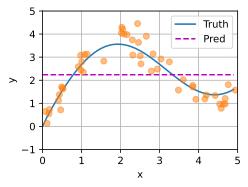

In [4]:
y_hat = torch.repeat_interleave(y_train.mean(), n_test)  
# 使用 PyTorch 的 repeat_interleave 函数，将 y_train 的均值重复 n_test 次，结果赋值给 y_hat
# y_hat: 预测值
# torch: PyTorch 库
# repeat_interleave: 重复插入（英文全称：repeat interleave）
# y_train.mean(): 计算 y_train 的均值
# n_test: 测试样本数量

plot_kernel_reg(y_hat)  
# 调用 plot_kernel_reg 函数，传入 y_hat 作为参数，绘制核回归图
# plot_kernel_reg: 绘制核回归图的函数
# y_hat: 预测值


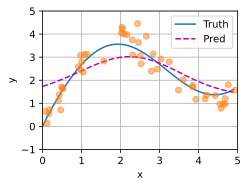

In [5]:
# X_repeat的形状:(n_test,n_train),
# 每一行都包含着相同的测试输入（例如：同样的查询）
X_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))# repeat_interleave 函数的作用是按指定次数重复元素，中文翻译为 “按间隔重复”。
# interleave  表示交错或间隔插入的意思。
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)
# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)
plot_kernel_reg(y_hat)

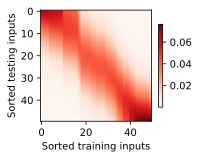

In [6]:
d2l.show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),  
# 使用 d2l 的 show_heatmaps 函数显示热图，将 attention_weights 先后进行两次 unsqueeze 操作，使其在第0维度增加维度
# d2l: Deep Learning 库
# show_heatmaps: 显示热图（英文全称：show heatmaps）
# attention_weights: 注意力权重
# unsqueeze: 增加维度（英文全称：unsqueeze）

                  xlabel='Sorted training inputs',  
# 设置 x 轴标签为 'Sorted training inputs'，表示已排序的训练输入
# xlabel: x 轴标签

                  ylabel='Sorted testing inputs')  
# 设置 y 轴标签为 'Sorted testing inputs'，表示已排序的测试输入
# ylabel: y 轴标签


In [7]:
X = torch.ones((2, 1, 4))  
# 使用 PyTorch 的 ones 函数生成一个 2x1x4 的全 1 张量，赋值给 X
# X: 张量 X
# torch: PyTorch 库
# ones: 生成全 1 张量
# (2, 1, 4): 张量的形状，2 是批次大小，1 是矩阵的行数，4 是列数

Y = torch.ones((2, 4, 6))  
# 使用 PyTorch 的 ones 函数生成一个 2x4x6 的全 1 张量，赋值给 Y
# Y: 张量 Y
# torch: PyTorch 库
# ones: 生成全 1 张量
# (2, 4, 6): 张量的形状，2 是批次大小，4 是矩阵的行数，6 是列数

torch.bmm(X, Y).shape  
# 使用 PyTorch 的 bmm 函数进行批次矩阵乘法，返回结果的形状
# torch: PyTorch 库
# bmm: 批次矩阵乘法（英文全称：batch matrix multiplication）
# X: 张量 X
# Y: 张量 Y
# .shape: 获取乘法结果的形状


torch.Size([2, 1, 6])

In [8]:
weights = torch.ones((2, 10)) * 0.1  
# 使用 PyTorch 的 ones 函数生成一个 2x10 的全 1 张量，然后将其每个元素乘以 0.1，赋值给 weights
# weights: 权重
# torch: PyTorch 库
# ones: 生成全 1 张量
# (2, 10): 张量的形状，2 是批次大小，10 是列数
# * 0.1: 将每个元素乘以 0.1

values = torch.arange(20.0).reshape((2, 10))  
# 使用 PyTorch 的 arange 函数生成从 0 到 19 的浮点数张量，然后使用 reshape 函数将其变为 2x10 形状，赋值给 values
# values: 值
# torch: PyTorch 库
# arange: 生成连续数值的张量
# 20.0: 生成从 0 到 19 的连续浮点数
# reshape: 调整张量形状
# (2, 10): 将张量调整为 2x10 的形状

torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))  
# 使用 PyTorch 的 bmm 函数进行批次矩阵乘法，先对 weights 在第 1 维度增加一个维度，对 values 在最后一维增加一个维度，然后进行矩阵乘法
# torch: PyTorch 库
# bmm: 批次矩阵乘法（英文全称：batch matrix multiplication）
# weights.unsqueeze(1): 对 weights 在第 1 维增加一个维度，形状变为 (2, 1, 10)
# values.unsqueeze(-1): 对 values 在最后一维增加一个维度，形状变为 (2, 10, 1)


tensor([[[ 4.5000]],

        [[14.5000]]])

In [9]:
class NWKernelRegression(nn.Module):  
# 定义 NWKernelRegression 类，继承自 nn.Module
# NWKernelRegression: Nadaraya-Watson 核回归模型
# nn: PyTorch 神经网络模块 (Neural Networks)

    def __init__(self, **kwargs):  
    # 初始化函数，接收任意数量的关键字参数
    # __init__: 初始化方法
    # **kwargs: 任意关键字参数

        super().__init__(**kwargs)  
        # 调用父类的初始化方法，传递关键字参数
        # super(): 调用父类方法

        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))  
        # 定义可训练参数 w，初始值为随机生成的一个标量张量，并且要求在梯度计算时跟踪它
        # self.w: 核回归中的可训练权重
        # nn.Parameter: 用于定义需要训练的参数
        # torch.rand: 随机生成一个在 [0, 1) 范围内的张量
        # requires_grad=True: 表示该参数需要计算梯度

    def forward(self, queries, keys, values):  
    # 定义前向传播函数，输入为 queries、keys 和 values
    # forward: 前向传播
    # queries: 查询张量
    # keys: 键张量
    # values: 值张量

        # queries 和 attention_weights 的形状为(查询个数, “键－值”对个数)
        queries = queries.repeat_interleave(keys.shape[1]).reshape((-1, keys.shape[1]))  
        # 通过 repeat_interleave 函数重复 queries，重复的次数为键－值对的个数，随后 reshape 成形状为 (查询个数, 键－值对个数)
        # repeat_interleave: 重复插入（英文全称：repeat interleave）
        # keys.shape[1]: 键－值对的个数
        # reshape: 调整张量形状

        self.attention_weights = nn.functional.softmax(  
        # 使用 softmax 函数计算注意力权重
        # self.attention_weights: 注意力权重
        # nn.functional.softmax: Softmax 激活函数

            -((queries - keys) * self.w)**2 / 2, dim=1)  
        # 计算 queries 和 keys 之间的差异，并通过权重 w 进行缩放，然后取平方，最后通过 softmax 正规化成注意力权重
        # **2: 平方运算
        # / 2: 标准高斯核的归一化常数
        # dim=1: 在第 1 维上进行 softmax 操作

        # values 的形状为 (查询个数, “键－值”对个数)
        return torch.bmm(self.attention_weights.unsqueeze(1),  
        # 使用 batch matrix multiplication (bmm) 进行矩阵乘法，先对注意力权重增加一个维度
        # torch.bmm: 批次矩阵乘法 (batch matrix multiplication)
        # self.attention_weights.unsqueeze(1): 在第 1 维增加一个维度

                         values.unsqueeze(-1)).reshape(-1)  
        # 对 values 增加最后一个维度，然后进行矩阵乘法，最后将结果 reshape 成一维
        # values.unsqueeze(-1): 对 values 在最后一维增加一个维度
        # reshape(-1): 将张量压平成一维


In [10]:
# X_tile 的形状为 (n_train, n_train)，每一行都包含相同的训练输入
X_tile = x_train.repeat((n_train, 1))  
# 使用 repeat 函数，将训练输入 x_train 沿第 0 维（行）重复 n_train 次，生成一个形状为 (n_train, n_train) 的张量 X_tile
# X_tile: 重复后的训练输入张量
# x_train: 训练输入
# repeat: 重复操作

# Y_tile 的形状为 (n_train, n_train)，每一行都包含相同的训练输出
Y_tile = y_train.repeat((n_train, 1))  
# 使用 repeat 函数，将训练输出 y_train 沿第 0 维（行）重复 n_train 次，生成一个形状为 (n_train, n_train) 的张量 Y_tile
# Y_tile: 重复后的训练输出张量
# y_train: 训练输出
# repeat: 重复操作

# keys 的形状为 (n_train, n_train - 1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))  
# 使用 torch.eye 生成 n_train 大小的单位矩阵，减去该矩阵再转换为布尔型来获取非对角线元素，将这些元素从 X_tile 中取出并重塑为 (n_train, n_train - 1) 的张量 keys
# keys: 训练输入键张量
# torch.eye: 生成单位矩阵
# type(torch.bool): 将矩阵转换为布尔类型
# reshape: 重塑张量形状

# values 的形状为 (n_train, n_train - 1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))  
# 使用与 keys 相同的操作，将非对角线元素从 Y_tile 中取出并重塑为 (n_train, n_train - 1) 的张量 values
# values: 训练输出值张量
# torch.eye: 生成单位矩阵
# type(torch.bool): 将矩阵转换为布尔类型
# reshape: 重塑张量形状


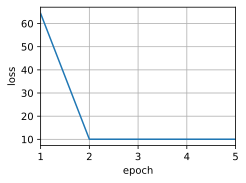

In [11]:
net = NWKernelRegression()  
# 创建 NWKernelRegression 模型实例并赋值给 net
# net: 模型实例
# NWKernelRegression: Nadaraya-Watson 核回归模型

loss = nn.MSELoss(reduction='none')  
# 使用均方误差损失函数 (Mean Squared Error Loss)，不进行损失的自动求和（reduction='none' 表示不进行归约）
# loss: 损失函数
# nn.MSELoss: 均方误差损失 (Mean Squared Error Loss)
# reduction='none': 不进行损失归约

trainer = torch.optim.SGD(net.parameters(), lr=0.5)  
# 使用随机梯度下降 (Stochastic Gradient Descent) 优化器对模型的参数进行优化，学习率设为 0.5
# trainer: 优化器
# torch.optim.SGD: 随机梯度下降（英文全称：Stochastic Gradient Descent）
# net.parameters(): 模型参数
# lr=0.5: 学习率

animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])  
# 使用 d2l 的 Animator 类来绘制损失值变化曲线，设置 x 轴标签为 'epoch'，y 轴标签为 'loss'，x 轴范围为 [1, 5]
# animator: 动画绘图工具
# d2l.Animator: 动画工具
# xlabel: x 轴标签
# ylabel: y 轴标签
# xlim: x 轴范围

for epoch in range(5):  
# 循环进行 5 个训练周期
# epoch: 训练周期
# range(5): 从 0 到 4 进行循环，共 5 次

    trainer.zero_grad()  
    # 在每个训练周期开始前，将优化器中的梯度清零
    # zero_grad: 清除前一轮的梯度

    l = loss(net(x_train, keys, values), y_train)  
    # 计算模型的输出与真实训练标签之间的损失，使用 x_train, keys 和 values 作为输入
    # l: 当前批次的损失
    # net(x_train, keys, values): 模型的预测输出
    # y_train: 真实训练标签

    l.sum().backward()  
    # 对损失进行求和，然后反向传播梯度以更新模型参数
    # sum(): 对损失进行求和
    # backward(): 反向传播

    trainer.step()  
    # 使用优化器根据反向传播的梯度更新模型参数
    # step(): 优化步骤

    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')  
    # 输出当前 epoch 的编号和损失值，保留 6 位小数
    # print: 打印信息
    # epoch + 1: 当前训练周期（从 1 开始）
    # float(l.sum()): 将损失值转换为浮点数并进行输出

    animator.add(epoch + 1, float(l.sum()))  
    # 将当前 epoch 和损失值添加到动画中，用于绘制损失曲线
    # animator.add: 动画工具添加数据
    # epoch + 1: 当前训练周期（从 1 开始）
    # float(l.sum()): 当前的总损失


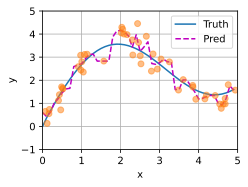

In [14]:
# keys 的形状为 (n_test, n_train)，每一行包含相同的训练输入（例如，相同的键）
keys = x_train.repeat((n_test, 1))  
# 使用 repeat 函数，将训练输入 x_train 沿第 0 维（行）重复 n_test 次，生成形状为 (n_test, n_train) 的张量 keys
# keys: 键张量（训练输入重复 n_test 次）
# x_train: 训练输入
# n_test: 测试样本数量
# repeat: 重复操作

# values 的形状为 (n_test, n_train)
values = y_train.repeat((n_test, 1))  
# 使用 repeat 函数，将训练输出 y_train 沿第 0 维（行）重复 n_test 次，生成形状为 (n_test, n_train) 的张量 values
# values: 值张量（训练输出重复 n_test 次）
# y_train: 训练输出
# n_test: 测试样本数量
# repeat: 重复操作

y_hat = net(x_test, keys, values).unsqueeze(1).detach()  
# 调用 net 模型进行预测，输入为 x_test、keys 和 values，预测结果 y_hat 被调整维度并从计算图中分离出来
# y_hat: 预测值
# net(x_test, keys, values): 使用核回归模型进行预测，输入为 x_test（测试输入）、keys（训练键）、values（训练值）
# unsqueeze(1): 在第 1 维增加一个维度，使预测结果的形状适配后续操作
# detach(): 从计算图中分离预测结果，以防止反向传播

plot_kernel_reg(y_hat)  
# 调用 plot_kernel_reg 函数，传入预测结果 y_hat，绘制核回归图
# plot_kernel_reg: 绘制核回归图的函数
# y_hat: 预测结果


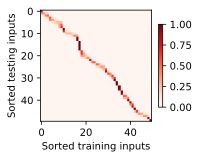

In [15]:
d2l.show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),  
# 使用 d2l 库中的 show_heatmaps 函数显示热图，将 net 模型中的注意力权重进行两次维度扩展，然后显示为热图
# d2l: 深度学习库 (Deep Learning Library)
# show_heatmaps: 显示热图函数
# net.attention_weights: 模型的注意力权重
# unsqueeze(0): 在第 0 维度增加一个维度，第一次扩展
# unsqueeze(0): 再次在第 0 维度增加一个维度，第二次扩展

                  xlabel='Sorted training inputs',  
# 设置热图的 x 轴标签为 'Sorted training inputs'，表示已排序的训练输入
# xlabel: x 轴标签

                  ylabel='Sorted testing inputs')  
# 设置热图的 y 轴标签为 'Sorted testing inputs'，表示已排序的测试输入
# ylabel: y 轴标签
